In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset
df=pd.read_csv("Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#first removed unnamed  column,because not needed 
df.drop("Email",axis=1,inplace=True)

In [5]:
df.drop("Address",axis=1,inplace=True)

In [6]:
#to check null values
df.isnull().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


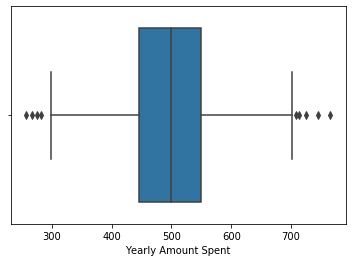

In [8]:
#to check outlier :use boxplot
sns.boxplot(df["Yearly Amount Spent"])
plt.show()

In [9]:
#separate the numerical data and categorical data
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes(object)

In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.7 KB


In [11]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
Avatar    500 non-null object
dtypes: object(1)
memory usage: 4.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


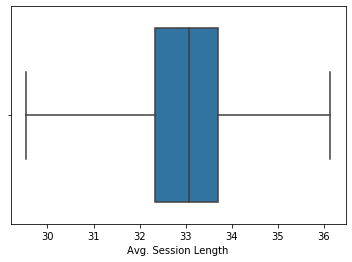

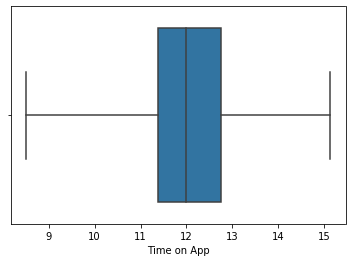

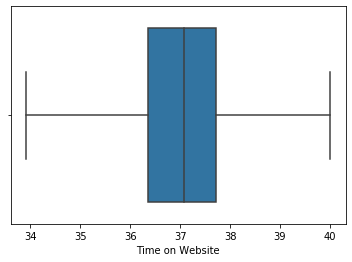

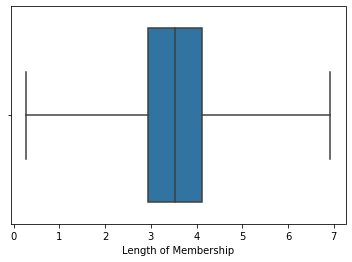

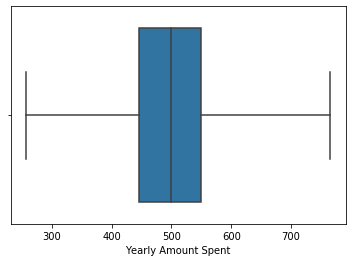

In [12]:
df.info()
for col in df_num:
    plt.figure()
    sns.boxplot(data=df_num,x=col,whis=3)
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()  #le user defined object
    df_cat[col]=le.fit_transform(df_cat[col])
    #fit_transform() inbuilt function of LabelEncoder class
    

In [15]:
df_cat.head()

,Avatar
0,132
1,25
2,6
3,114
4,80


In [16]:
#to check skewness value 
from scipy.stats import skew

Avg. Session Length
-0.03207820208079134


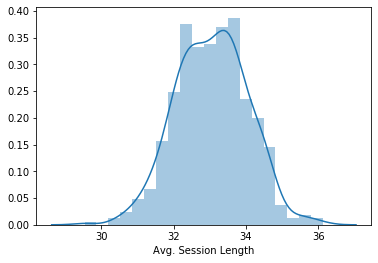

Time on App
-0.08885351110323013


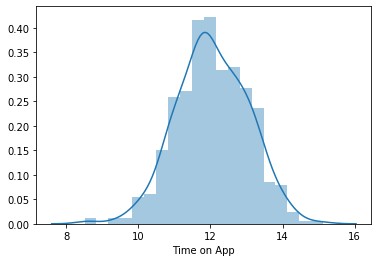

Time on Website
0.012105424233404407


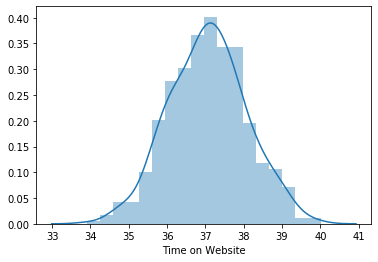

Length of Membership
-0.10628796203551165


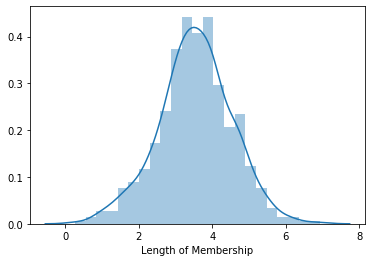

Yearly Amount Spent
0.03468572646546689


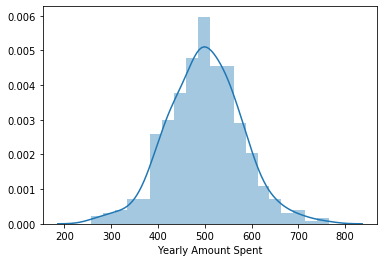

In [17]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

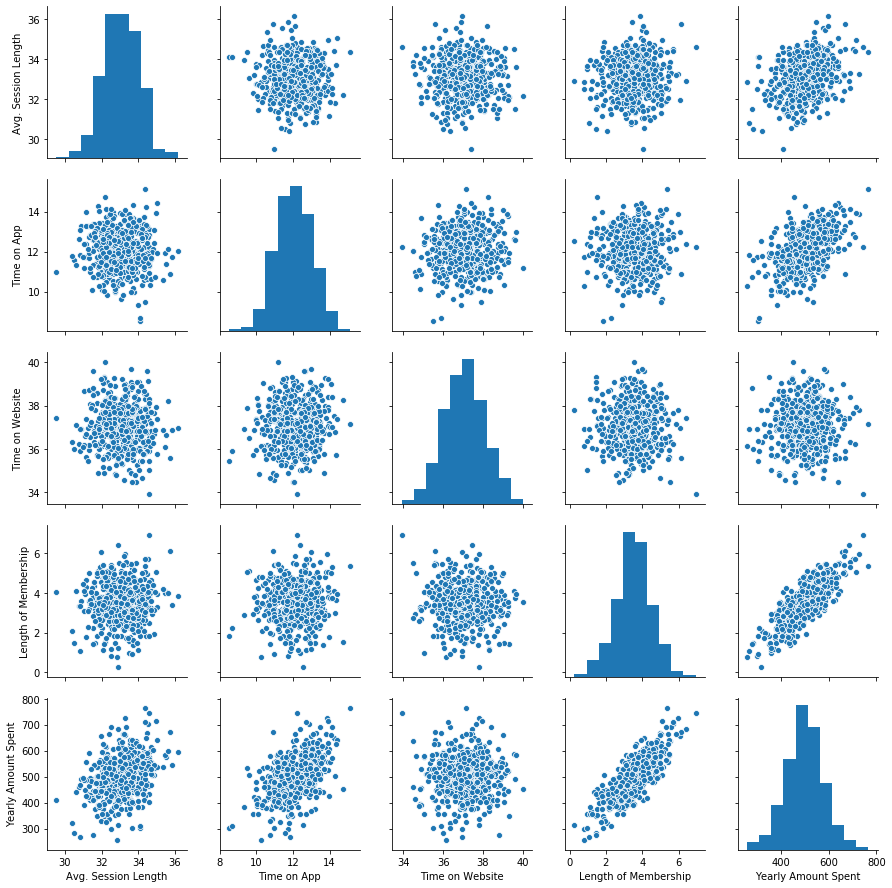

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
#corr() inbuilt function which define the correlation of independent variable with dependent variable (-1 to +1)
df_num.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [20]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


[]

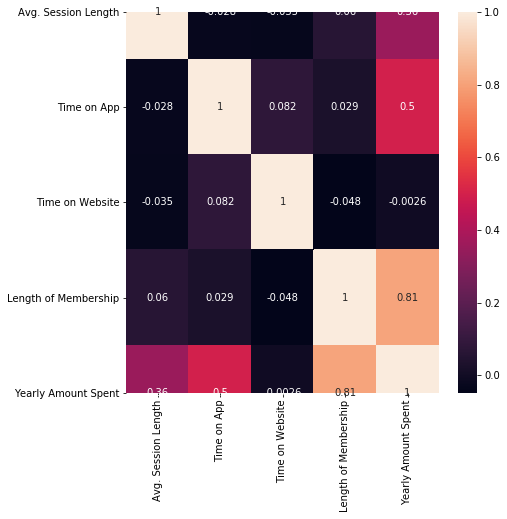

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(df_num.corr(),annot=True)
plt.plot()

In [22]:
#to join means concatenate of cars_num and cars_cat and hold new dataframe cars_new 
df_new=pd.concat([df_cat,df_num],axis=1)

In [23]:
df_new.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,25,31.926272,11.109461,37.268959,2.664034,392.204933
2,6,33.000915,11.330278,37.110597,4.104543,487.547505
3,114,34.305557,13.717514,36.721283,3.120179,581.852344
4,80,33.330673,12.795189,37.536653,4.446308,599.406092


In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Avatar                  500 non-null int32
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), int32(1)
memory usage: 21.6 KB


# Performing the Model 
#Time on App","Length of Membership" with "Yearly Amount Spent"

In [25]:
#first select x (independent variable means input) and y (target variable)
x=df_new[["Time on App","Length of Membership"]] #[[]]:input always expects 2D array
y=df_new["Yearly Amount Spent"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
#perform the Linear Regression model
from sklearn.linear_model import LinearRegression 

In [29]:
#create object of LinearRegression class
lr=LinearRegression() #here lr is user defined object of LinearRegression class

In [30]:
#train the model:use fit() method
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
#to check the slope means coeeficient:use inbuilt method coef_
lr.coef_

array([37.07809804, 62.4529413 ])

In [32]:
#to check the intercept then use inbuilt method intercept_
lr.intercept_

-168.1961334620176

In [33]:
#testing

In [34]:
#use inbuilt method predict() of Linear Regresiion for testing
y_pred=lr.predict(x_test) #predicted output =predict(input)

In [35]:
y_pred

array([475.4473706 , 546.71788419, 570.27618878, 485.45335659,
       381.62712601, 500.26672431, 474.06306314, 451.61176864,
       500.70334156, 451.0478525 , 484.94897222, 508.05894575,
       553.60569859, 552.46293131, 678.48333907, 494.13397615,
       297.62212269, 419.73575696, 466.97202436, 483.80658604,
       438.98734193, 399.57645579, 460.21506026, 385.08368391,
       728.53058025, 471.04723887, 520.79606268, 496.69655924,
       317.44442853, 565.53545329, 503.61322607, 418.65012657,
       491.84789018, 293.88165532, 446.12616993, 509.70105437,
       641.26763015, 583.9101545 , 490.69740443, 429.98181919,
       504.68980848, 531.75175653, 409.22923915, 522.28248393,
       507.38150488, 434.57418947, 474.97716673, 498.65205453,
       429.34519262, 417.87111986, 551.48227336, 374.79612199,
       620.8250662 , 463.65826495, 459.38771907, 640.77365984,
       354.12773176, 520.72105463, 428.41674225, 541.45449479,
       571.82359592, 582.53707641, 505.37632338, 615.27

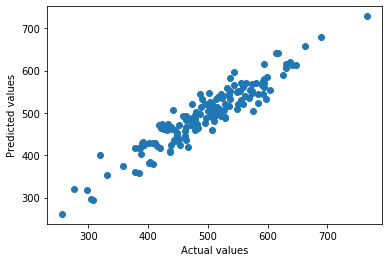

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
#mean_squared_error
mse=mean_squared_error(y_test,y_pred)#RSS/no.of datapoint

In [39]:
#root mean squared error(RMSE)
rmse=np.sqrt(mse)

In [40]:
r2=r2_score(y_test,y_pred)

In [41]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R2 Score:",r2)

Mean_squared_error: 779.952367530163
Root_mean_squared_error: 27.927627316515146
R2 Score: 0.8887802619375761


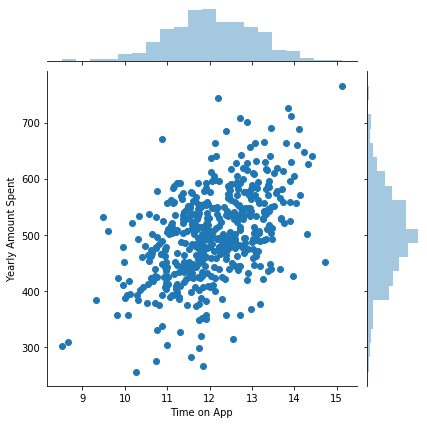

In [42]:
sns.jointplot(df_new['Time on App'],df_new['Yearly Amount Spent'])
plt.show()

# AFTER ADDING Avg. Session Length

In [43]:
x=df_new[["Time on App","Length of Membership","Avg. Session Length"]] #[[]]:input always expects 2D array
y=df_new["Yearly Amount Spent"]

In [44]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [45]:
lr1=LinearRegression()

In [46]:
lr1.fit(x_train,y_train)

LinearRegression()

In [47]:
lr1.coef_

array([38.83699157, 61.28526768, 25.83045496])

In [48]:
lr1.intercept_

-1038.7195888604804

In [49]:
y_pred=lr1.predict(x_test)

In [50]:
y_pred

array([498.98339799, 519.69677821, 563.14296964, 479.10469226,
       423.56044632, 509.16261636, 478.93898716, 460.46684469,
       519.4540681 , 438.94148733, 487.77099792, 526.20622237,
       577.02551037, 554.03555305, 685.35667629, 473.09315501,
       314.95193257, 458.04729614, 452.72445361, 461.03312154,
       456.97673394, 332.44976517, 504.35471049, 401.67734863,
       766.23734717, 425.64438253, 513.68451401, 477.14885844,
       306.90679963, 590.35307768, 505.09945796, 390.37591824,
       463.62363725, 316.37131177, 465.64929416, 549.87051614,
       619.83237985, 591.64667183, 495.96697057, 402.22747759,
       506.5733116 , 547.20918228, 423.24175995, 559.27749405,
       441.81092745, 433.33041732, 430.45519841, 506.81507214,
       426.18441823, 402.03484206, 552.81771346, 353.9399072 ,
       639.94538681, 478.76106023, 452.02721973, 621.23529159,
       326.18345319, 491.41805861, 411.5249881 , 549.05312045,
       587.47381043, 548.15577444, 567.94210201, 588.46

Text(0, 0.5, 'Predicted values')

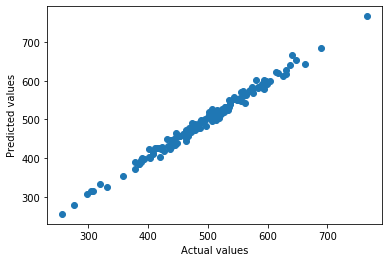

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [52]:
mse=mean_squared_error(y_test,y_pred)

In [53]:
rmse=np.sqrt(mse)

In [54]:
r2=r2_score(y_test,y_pred)

In [55]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R2 Score:",r2)

Mean_squared_error: 81.31178073509909
Root_mean_squared_error: 9.017304516045751
R2 Score: 0.9884050932707795


# Performing The Model
"Time on Website","Length of Membership" with "Yearly Amount Spent"

In [56]:
x=df_new[["Time on Website","Length of Membership"]] #[[]]:input always expects 2D array
y=df_new["Yearly Amount Spent"]

In [57]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [58]:
#create object of LinearRegression class
lr2=LinearRegression()

In [59]:
#train the model:use fit() method
lr2.fit(x_train,y_train)

LinearRegression()

In [60]:
#to check the slope means coeeficient:use inbuilt method coef_
lr2.coef_

array([ 3.68596341, 63.71211312])

In [61]:
#to check the intercept then use inbuilt method intercept_
lr2.intercept_

138.09839145476855

In [62]:
#testing

In [63]:
#use inbuilt method predict() of Linear Regresiion for testing
y_pred=lr2.predict(x_test)

In [64]:
y_pred

array([465.54456315, 462.51992282, 534.55832921, 491.31913685,
       394.63904032, 491.71924441, 487.1052598 , 490.57249724,
       505.50000876, 435.46511437, 531.69423384, 464.39920598,
       518.49619298, 523.39058763, 626.69068002, 490.32135592,
       331.75862726, 395.52009223, 519.19361882, 472.17453675,
       470.40265865, 404.72117104, 461.23680365, 418.28665416,
       617.67788485, 548.35597197, 531.25189883, 516.6948156 ,
       325.32370516, 546.87960553, 496.84642547, 424.34460877,
       518.02620046, 413.95747348, 503.43929337, 482.63449755,
       595.84201969, 559.74082047, 492.61832464, 500.84046411,
       550.17930495, 572.43491229, 382.17364593, 455.29586551,
       534.64414348, 386.68917941, 475.72755338, 540.40517909,
       422.0554946 , 441.4387951 , 564.90794105, 345.3747424 ,
       615.181853  , 506.65160951, 440.85317747, 584.13979226,
       398.9487233 , 514.71226115, 433.81927626, 519.55884755,
       604.89418848, 597.246296  , 529.86274871, 599.16

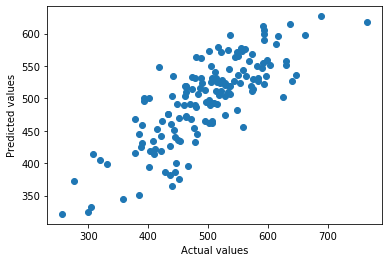

In [65]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [66]:
#mean_squared_error
mse=mean_squared_error(y_test,y_pred)#RSS/no.of datapoint

In [67]:
#root mean squared error(RMSE)
rmse=np.sqrt(mse)

In [68]:
r2=r2_score(y_test,y_pred)

In [69]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R2 Score:",r2)

Mean_squared_error: 2532.4614313731986
Root_mean_squared_error: 50.3235673553972
R2 Score: 0.6388757714237905


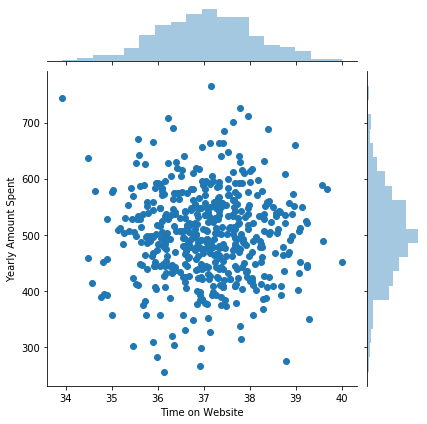

In [70]:
sns.jointplot(df_new['Time on Website'],df_new['Yearly Amount Spent'])
plt.show()

# AFTER ADDING Avg. Session Length

In [71]:
x=df_new[["Time on Website","Length of Membership","Avg. Session Length"]] #[[]]:input always expects 2D array
y=df_new["Yearly Amount Spent"]

In [72]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [73]:
lr3=LinearRegression()

In [74]:
lr3.fit(x_train,y_train)

LinearRegression()

In [75]:
lr3.coef_

array([ 3.6386264 , 62.70317893, 23.20662447])

In [76]:
lr3.intercept_

-623.3116108136471

In [77]:
y_pred=lr3.predict(x_test)

In [78]:
y_pred

array([486.38253473, 434.73007707, 526.75055064, 486.0153578 ,
       432.68123755, 499.50117225, 492.15729284, 500.49197526,
       522.60182786, 423.78075103, 536.40994612, 478.99143772,
       537.94760524, 523.91465171, 630.78696532, 471.02728358,
       348.97144921, 428.63517052, 508.89425897, 451.19818959,
       488.37662831, 344.81287796, 501.05759798, 434.47794298,
       646.79381172, 510.6580259 , 525.6548244 , 500.25129757,
       316.26252986, 568.58651072, 497.74803909, 399.37326498,
       493.73391409, 439.54195789, 523.243021  , 517.65283758,
       574.66959648, 565.56031347, 497.55523219, 478.52952235,
       553.52661352, 587.77617896, 393.7845755 , 485.9583062 ,
       476.89149825, 383.79552128, 435.95089288, 549.40099972,
       419.23394389, 428.13075858, 566.55289321, 325.52964456,
       632.62968777, 522.27322317, 433.34461891, 563.97241489,
       375.87787674, 488.15037992, 418.62649476, 525.40124752,
       620.19287436, 567.15100487, 587.20539877, 574.18

Text(0, 0.5, 'Predicted values')

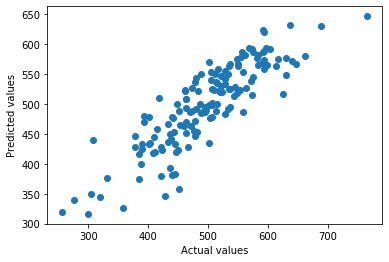

In [79]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [80]:
mse=mean_squared_error(y_test,y_pred)

In [81]:
rmse=np.sqrt(mse)

In [82]:
r2=r2_score(y_test,y_pred)

In [83]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R2 Score:",r2)

Mean_squared_error: 1735.8194723024362
Root_mean_squared_error: 41.6631668539783
R2 Score: 0.7524754137942073


# Multi Linear Regression

In [84]:
x=df_new[["Time on App","Time on Website","Length of Membership","Avg. Session Length"]]
y=df_new["Yearly Amount Spent"]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [86]:
lr4=LinearRegression()

In [87]:
lr4.fit(x_train,y_train)

LinearRegression()

In [88]:
lr4.coef_

array([38.80900145,  0.28174274, 61.30479927, 25.82792018])

In [89]:
'''x=df_new[["Time on App","Length of Membership"]] then coefficient/slope:37.07809804, 62.4529413
   x=df_new[["Time on App","Length of Membership","Avg. Session Length"]]:38.83699157, 61.28526768, 25.83045496
   x=df_new[["Time on Website","Length of Membership"]]:3.68596341, 63.71211312
   x=df_new[["Time on Website","Length of Membership","Avg. Session Length"]]:3.6386264 , 62.70317893, 23.20662447'''

#There is no change in slope of Time on App 
#But There is change in slope of Time on Website the slope is reduced that means it is not 
#important feature for company to put efforts.

'x=df_new[["Time on App","Length of Membership"]] then coefficient/slope:37.07809804, 62.4529413\n   x=df_new[["Time on App","Length of Membership","Avg. Session Length"]]:38.83699157, 61.28526768, 25.83045496\n   x=df_new[["Time on Website","Length of Membership"]]:3.68596341, 63.71211312\n   x=df_new[["Time on Website","Length of Membership","Avg. Session Length"]]:3.6386264 , 62.70317893, 23.20662447'

In [90]:
lr4.intercept_

-1048.8204290065078

In [91]:
x=df_new[["Time on App","Length of Membership","Avg. Session Length"]]
y=df_new["Yearly Amount Spent"]

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [93]:
lr5=LinearRegression()

In [94]:
lr5.fit(x_train,y_train)

LinearRegression()

In [95]:
lr5.coef_

array([38.83699157, 61.28526768, 25.83045496])

In [96]:
lr5.intercept_

-1038.7195888604804

In [97]:
#there is no effect on slope of "Time on App","Length of Membership","Avg. Session Length"  when we removed "Time on Website"

In [98]:
y_pred=lr5.predict(x_test)

In [99]:
y_pred

array([498.98339799, 519.69677821, 563.14296964, 479.10469226,
       423.56044632, 509.16261636, 478.93898716, 460.46684469,
       519.4540681 , 438.94148733, 487.77099792, 526.20622237,
       577.02551037, 554.03555305, 685.35667629, 473.09315501,
       314.95193257, 458.04729614, 452.72445361, 461.03312154,
       456.97673394, 332.44976517, 504.35471049, 401.67734863,
       766.23734717, 425.64438253, 513.68451401, 477.14885844,
       306.90679963, 590.35307768, 505.09945796, 390.37591824,
       463.62363725, 316.37131177, 465.64929416, 549.87051614,
       619.83237985, 591.64667183, 495.96697057, 402.22747759,
       506.5733116 , 547.20918228, 423.24175995, 559.27749405,
       441.81092745, 433.33041732, 430.45519841, 506.81507214,
       426.18441823, 402.03484206, 552.81771346, 353.9399072 ,
       639.94538681, 478.76106023, 452.02721973, 621.23529159,
       326.18345319, 491.41805861, 411.5249881 , 549.05312045,
       587.47381043, 548.15577444, 567.94210201, 588.46

Text(0, 0.5, 'Predicted values')

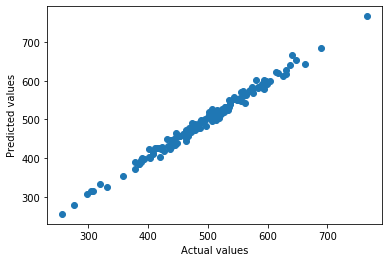

In [100]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [101]:
mse=mean_squared_error(y_test,y_pred)

In [102]:
r2=r2_score(y_test,y_pred)

In [103]:
rmse=np.sqrt(mse)

In [104]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R2 Score:",r2)

Mean_squared_error: 81.31178073509909
Root_mean_squared_error: 9.017304516045751
R2 Score: 0.9884050932707795


In [105]:
#R2 Score is best because it is near to 1

# assumptions of Linear Regression

In [106]:
'''1.There should be kinear relationship between independent variable and dependent variable'''

'1.There should be kinear relationship between independent variable and dependent variable'

In [107]:
#find the residual 
residual=y_test-y_pred

In [108]:
#original 
y_test

304    494.687156
340    501.122492
47     563.672873
67     469.310861
479    402.167122
          ...    
331    533.040060
197    662.961088
95     543.340166
122    514.239521
23     519.340989
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [109]:
residual

304    -4.296242
340   -18.574287
47      0.529904
67     -9.793831
479   -21.393324
         ...    
331     8.828776
197    19.422087
95     -9.851621
122    15.725969
23     15.213967
Name: Yearly Amount Spent, Length: 150, dtype: float64

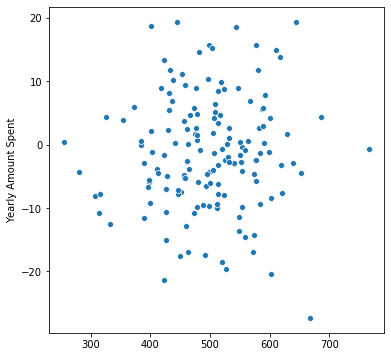

In [110]:
#scatterplot between y_pred and residual,to check linear relationship or not
plt.figure(figsize=(6,6))#scatterplot between y_pred and residual,to check linear relationship or not
sns.scatterplot(y_pred,residual)
plt.show()


In [111]:
'''no linear relationship means there no fullfillment of assumption'''

'no linear relationship means there no fullfillment of assumption'

In [112]:
'''2.Assumption of linear regression:
   if found linear relation then also check homoskedastik or not'''

'2.Assumption of linear regression:\n   if found linear relation then also check homoskedastik or not'

In [113]:
'''3.No multicolinearity'''

'3.No multicolinearity'

In [114]:
'''4.if we plot residual error(of each data point)then we should get a bell shapped curve means 
Normal Distribution(skewness=0,symmetric curve) means data are normally distributed on both side'''

'4.if we plot residual error(of each data point)then we should get a bell shapped curve means \nNormal Distribution(skewness=0,symmetric curve) means data are normally distributed on both side'

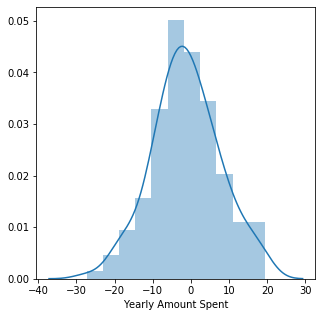

In [115]:
#distplot:Normal Distributed curve :it is also called frequency plot
plt.figure(figsize=(5,5))
sns.distplot(residual)
plt.show()

In [116]:
#Not a bell shaped curve

In [117]:
#work on 3 assumptions which are not fullfilled from Multi Linear Regression
#means use polynomial regression to solve these 3 assumptions

# Polynomial Regression

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
x=df_new[["Time on App","Length of Membership","Avg. Session Length"]]
y=df_new["Yearly Amount Spent"]

In [120]:
#after that create the object of Polynomial Features class and passing the degree x=2
pf=PolynomialFeatures(3)

In [121]:
x_poly=pf.fit_transform(x)

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.30,random_state=1)

In [123]:
#create object of LinearRegression class
lr6=LinearRegression()

In [124]:
#Train the model
lr6.fit(x_train,y_train)

LinearRegression()

In [125]:
#we can perform the prediction (test)
y_pred=lr6.predict(x_test)

In [126]:
#mean_squared_error
mse=mean_squared_error(y_test,y_pred)#RSS/no.of datapoint
#root mean squared error(RMSE)
rmse=np.sqrt(mse)


In [127]:
print("mean_squared_error for Time on App,Length of Membership,Avg. Session Length:",mse)
print("root_mean_squared_error for Time on App,Length of Membership,Avg. Session Length:",rmse)

mean_squared_error for Time on App,Length of Membership,Avg. Session Length: 87.7195311110599
root_mean_squared_error for Time on App,Length of Membership,Avg. Session Length: 9.365870547421627


In [128]:
#evaluation method of Linear Regression use r2-score in built method:
r2_score(y_test,y_pred) 

0.9874913601403313

In [129]:
#very great score ,it is near to 1

In [130]:
#find the residuals
residuals1=y_test-y_pred

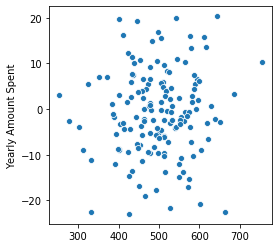

In [131]:
#scatterplot between y_pred and residual,to check linear relationship or not
plt.figure(figsize=(4,4))
sns.scatterplot(y_pred,residuals1)
plt.show()

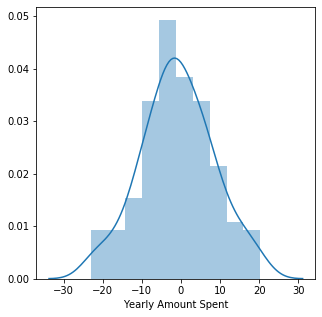

In [132]:
#distplot:Normal Distributed curve :it is also called frequency plot
plt.figure(figsize=(5,5))
sns.distplot(residuals1)
plt.show()

# Regularisation

In [133]:
#check score of training
lr6.score(x_train,y_train)

0.9826488541654688

In [134]:
#check score of testing
lr6.score(x_test,y_test)

0.9874913601403313

In [135]:
#There is No Over Fittting or Under Fitting in this dataset

# 1.ANNOVA Test

In [136]:
x=df_new[["Time on App","Time on Website","Length of Membership","Avg. Session Length"]]
y=df_new["Yearly Amount Spent"]

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [138]:
lr7=LinearRegression()

In [139]:
#train the model:use fit() method
lr7.fit(x_train,y_train)

LinearRegression()

In [140]:
#testing the model
y_pred=lr7.predict(x_test)

In [141]:
#check score of testing
lr7.score(x_test,y_test)

0.9884637234896453

In [142]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [143]:
#Create object of SelectKBest Test class
anova=SelectKBest(score_func=f_regression,k=3)

In [144]:
x_train_new=anova.fit_transform(x_train,y_train)

In [145]:
x_test_new=anova.transform(x_test)

In [146]:
anova.get_support()

array([ True, False,  True,  True])

In [147]:
x.columns

Index(['Time on App', 'Time on Website', 'Length of Membership',
       'Avg. Session Length'],
      dtype='object')

In [148]:
#we have selected the best features means input columns now again create the object of LinearRegression class

In [149]:
lr7_anova=LinearRegression()

In [150]:
#we train model 
lr7_anova.fit(x_train_new,y_train)

LinearRegression()

In [151]:
#to check the score 
lr7_anova.score(x_test_new,y_test)

0.9884050932707795

In [152]:
#after anova test applied(3 features),score will be 0.988 same as  preivous 0.988

# PCA (Principal Component Analysis)

In [153]:
#step1:standardization means scale(unit) of all features should be same

In [154]:
df_new.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,25,31.926272,11.109461,37.268959,2.664034,392.204933
2,6,33.000915,11.330278,37.110597,4.104543,487.547505
3,114,34.305557,13.717514,36.721283,3.120179,581.852344
4,80,33.330673,12.795189,37.536653,4.446308,599.406092


In [155]:
#in this dataset, unit of all features are not same then apply standardscaler
from sklearn.preprocessing import StandardScaler

In [156]:
for col in df_new:
    #create the object StandardScaler
    ss=StandardScaler()
    df_new[col]=ss.fit_transform(df_new[[col]])

In [157]:
df_new.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.543620,1.456351,0.607280,2.493589,0.550107,1.118654
1,-1.067144,-1.136502,-0.949464,0.206556,-0.870927,-1.351783
2,-1.530737,-0.052723,-0.727139,0.049681,0.572067,-0.148501
3,1.104426,1.263010,1.676390,-0.335978,-0.413996,1.041684
4,0.274838,0.279838,0.747770,0.471737,0.914422,1.263224


In [158]:
#apply PCA 
from sklearn.decomposition import PCA

In [159]:
#create the object of pcs class
pc=PCA(n_components=3,random_state=1)

#here n_components:it is parameter(how many principal component)

In [160]:
x=df_new[["Time on App","Time on Website","Length of Membership","Avg. Session Length"]]
y=df_new["Yearly Amount Spent"]

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [162]:
#training set
x_train_pc=pc.fit_transform(x_train,y_train)

In [163]:
#testing set
x_test_pc=pc.transform(x_test)

In [164]:
#basic steps 
#create the object of LinearRegression
lr8=LinearRegression()

In [165]:
#train the model
lr8.fit(x_train_pc,y_train)

LinearRegression()

In [166]:
#to check score
lr8.score(x_test_pc,y_test)

0.971964894193692

In [167]:
#In this dataset the conclusion about whether to focus the efforts on  mobile app experience
#or the website  is company should focus on mobile app experience as compare to website mobile 
#app experience has great score and output.